In [35]:
import numpy as np

# Define the size of the matrix (number of states)
MATRIX_SIZE = 6  # The environment has 6 states

# Define the reward matrix
M = np.matrix([
    [-1, -1, -1, -1, 0, -1],   # Rewards for moving from state 0 to other states
    [-1, -1, -1,  0, -1, 100], # Rewards for moving from state 1 to other states
    [-1, -1, -1,  0, -1, -1],  # Rewards for moving from state 2 to other states
    [-1,  0,  0, -1,  0, -1],  # Rewards for moving from state 3 to other states
    [ 0, -1, -1,  0, -1, 100], # Rewards for moving from state 4 to other states
    [-1,  0, -1, -1,  0, 100], # Rewards for moving from state 5 to other states
])


In [36]:
# Initialize the Q-table with zeros
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
# Q-table will store the learned values for each state-action pair.

# Set the discount factor (gamma)
gamma = 0.85
# Gamma determines the importance of future rewards. 
# A value close to 1 favors long-term rewards, while a value close to 0 favors immediate rewards.

# Set the initial state for the agent
initial_state = 0
# The state from which the agent starts its exploration.


In [37]:
# Function to determine the available actions for a given state
def available_actions(state):
    current_state_now = M[state, ]  # Retrieve the row corresponding to the current state from the reward matrix
    available_action = np.where(current_state_now >= 0)[1]  # Find actions with non-negative rewards
    return available_action

# Determine the available actions for the initial state
available_action = available_actions(initial_state)


In [38]:
# Function to randomly choose one of the available actions
def sample_next_action(available_actions_range):
    # Randomly select an action from the available actions
    next_action = int(np.random.choice(available_action, 1))
    return next_action

# Select an action for the current state
action = sample_next_action(available_action)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2000\1051822945.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_action, 1))


In [39]:
# Function to update the Q-matrix based on the chosen action
def update(current_state, action, gamma):
    # Find the maximum Q-value for the next state
    max_value = np.max(Q[action, ])
    
    # Update the Q-value for the current state-action pair
    Q[current_state, action] = M[current_state, action] + gamma * max_value

    # Normalize the Q-matrix values for comparison or visualization purposes
    if np.max(Q) > 0:
        return np.sum(Q / np.max(Q) * 100)  # Normalize Q-values to a percentage scale
    else:
        return 0  # Return 0 if all Q-values are 0

# Call the update function to update the Q-matrix
update(initial_state, action, gamma)


0

In [40]:
# List to store the scores for each iteration
scores = []

# Train the agent for 1000 iterations
for i in range(1000):
    # Randomly select a current state for the iteration
    current_state = np.random.randint(0, int(Q.shape[0]))

    # Determine the available actions from the current state
    available_action = available_actions(current_state)

    # Randomly sample an action from the available actions
    action = sample_next_action(available_action)

    # Update the Q-matrix based on the current state, chosen action, and gamma
    score = update(current_state, action, gamma)

    # Append the score (normalized Q-matrix sum) to the scores list
    scores.append(score)

# Print the trained Q-matrix
print("Trained Q matrix:")
print(Q / np.max(Q) * 100)  # Normalize the Q-matrix to a percentage scale for better visualization


Trained Q matrix:
[[  0.           0.           0.           0.          85.
    0.        ]
 [  0.           0.           0.          72.24957808   0.
  100.        ]
 [  0.           0.           0.          72.24957808   0.
    0.        ]
 [  0.          84.99823262  61.41214137   0.          84.99950362
    0.        ]
 [ 72.24957808   0.           0.          72.24957808   0.
  100.        ]
 [  0.          84.99950362   0.           0.          85.
   99.99941602]]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2000\1051822945.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_action, 1))


In [41]:
# Testing the trained Q-matrix
current_state = int(input("Enter the initial state value (0 to 5): "))  # Input the initial state
steps = [current_state]  # Initialize a list to store the path

# Loop until the agent reaches the goal state (state 5)
while current_state != 5:
    # Find the index of the maximum Q-value for the current state
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
    
    # Handle cases where multiple actions have the same maximum Q-value
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))  # Randomly select one
    else:
        next_step_index = int(next_step_index)  # Directly use the index

    # Append the chosen next step to the path
    steps.append(next_step_index)

    # Update the current state to the chosen next step
    current_state = next_step_index

# Output the most efficient path
print("Most Efficient Path!")
print(steps)


Most Efficient Path!
[4, 5]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2000\939067437.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index = int(next_step_index)  # Directly use the index


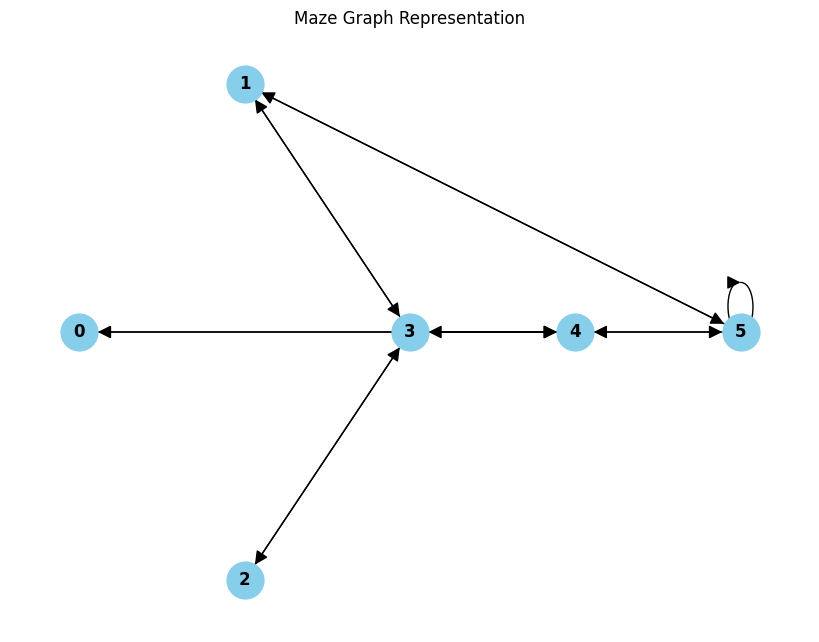

In [42]:
import networkx as nx
# Define the graph connections based on the reward matrix
edges = []
for i in range(MATRIX_SIZE):
    available_action = available_actions(i)
    for action in available_action:
        if M[i, action] >= 0:  # Valid action
            edges.append((i, action))  # Add an edge from state i to the action state

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Define node positions for visualization (adjust the layout as needed)
positions = {
    0: (0, 1),  # Position for state 0
    1: (1, 2),  # Position for state 1
    2: (1, 0),  # Position for state 2
    3: (2, 1),  # Position for state 3
    4: (3, 1),  # Position for state 4
    5: (4, 1),  # Position for state 5 (goal state)
}

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(
    G,
    pos=positions,
    with_labels=True,
    node_size=700,
    node_color="skyblue",
    font_weight="bold",
    arrowsize=20,
    edge_color="black",
)

# Add a title
plt.title("Maze Graph Representation")
plt.show()

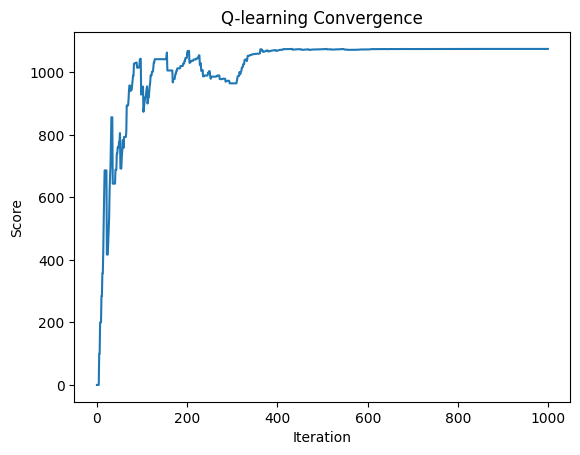

In [43]:
import matplotlib.pyplot as plt
plt.plot(scores)
plt.title("Q-learning Convergence")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.show()
